In [1]:
import tensorflow as tf

# LSTM TODO: ENLEVER

## Tokenise and Pad sequences (Optionel, deja fait)

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_text'])

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad sequences
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post')


KeyboardInterrupt: 

## Build the LSTM Model TODO: ENLEVER

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

max_length = 100

model = Sequential([
    Embedding(input_dim=20000, output_dim=128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])


#### Embedding Layer :
- Purpose: Converts word indices into dense vectors (embeddings).
- Parameters:
    - output_dim = 128 : Dimension of the embedding vectors. Each word will be represented as a 128-dimensional vector.
    - input_length = max_length : Length of input sequences. Required because the model needs to know the shape of its input.

#### LSTM Layer :
- Purpose: Processes the embedded sequences and captures temporal dependencies.
- Parameters:
    - 128 : Number of units (dimensionality of the output space). This is the number of LSTM cells in the layer.
    - dropout = 0.2 : Fraction of the input units to drop (regular dropout) to prevent overfitting.
    - recurrent_dropout = 0.2 : Fraction of the recurrent units to drop (dropout on the connections between the recurrent units).

#### Dense output layer :
- Purpose: Outputs a probability between 0 and 1, indicating the sentiment.
- Parameters:
    - 1 : Single neuron because it's a binary classification problem.
    - activation = 'sigmoid': Activation function that outputs values between 0 and 1.

## Compile the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- loss = 'binary_crossentropy': Loss function suitable for binary classification tasks.
- optimizer = 'adam': Adam optimizer is an efficient stochastic gradient descent method.
- metrics = ['accuracy']: Specifies the metric to evaluate during training and testing.

## Train the model

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming train_neg_padded and train_pos_padded are already defined
filename_pos = 'data/twitter-datasets/train_pos_full_embedding.txt'
filename_neg = 'data/twitter-datasets/train_neg_full_embedding.txt'

# Function to load embeddings
def load_embeddings(filename):
    embeddings = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                str_values = line.split()
                float_values = [float(val) for val in str_values]
                embedding = np.array(float_values)
                embeddings.append(embedding)
    return embeddings

pos_embeddings = load_embeddings(filename_pos)
neg_embeddings = load_embeddings(filename_neg)

train_neg_padded = np.array(neg_embeddings)
train_pos_padded = np.array(pos_embeddings)

# Create labels
neg_labels = np.zeros(train_neg_padded.shape[0], dtype=int)
pos_labels = np.ones(train_pos_padded.shape[0], dtype=int)

# Combine data and labels
train_padded = np.concatenate((train_neg_padded, train_pos_padded), axis=0)
train_labels = np.concatenate((neg_labels, pos_labels), axis=0)

# Shuffle data
indices = np.arange(train_padded.shape[0])
np.random.shuffle(indices)
train_padded = train_padded[indices]
train_labels = train_labels[indices]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_padded, train_labels, test_size=0.2, random_state=42)

# # Train the model
# model.fit(X_train, y_train, epochs=5, batch_size=32,
#           validation_data=(X_val, y_val))


- train_padded : Input data (padded sequences) for training.
- train_labels : Corresponding labels (0 or 1) for training data.
- epochs=5 : Number of times the model will cycle through the entire training dataset.
- batch_size = 32  Number of samples per gradient update. Smaller batch sizes can lead to more stable gradient estimates but increase computation time.
- validation_data=(val_padded, val_labels): Data on which to evaluate the model at the end of each epoch.

# Feedforward Neural Network TODO: METTRE AU PROPRE - RAPPORT EN PARLE

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming train_neg_padded and train_pos_padded are already defined
filename_pos = 'data/twitter-datasets/train_pos_full_embedding.txt'
filename_neg = 'data/twitter-datasets/train_neg_full_embedding.txt'

# Function to load embeddings
def load_embeddings(filename):
    embeddings = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                str_values = line.split()
                float_values = [float(val) for val in str_values]
                embedding = np.array(float_values)
                embeddings.append(embedding)
    return embeddings

pos_embeddings = load_embeddings(filename_pos)
neg_embeddings = load_embeddings(filename_neg)

train_neg_padded = np.array(neg_embeddings)
train_pos_padded = np.array(pos_embeddings)

# Create labels
neg_labels = np.zeros(train_neg_padded.shape[0], dtype=int)
pos_labels = np.ones(train_pos_padded.shape[0], dtype=int)

# Combine data and labels
train_padded = np.concatenate((train_neg_padded, train_pos_padded), axis=0)
train_labels = np.concatenate((neg_labels, pos_labels), axis=0)

# Shuffle data
indices = np.arange(train_padded.shape[0])
np.random.shuffle(indices)
train_padded = train_padded[indices]
train_labels = train_labels[indices]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_padded, train_labels, test_size=0.2, random_state=42)

In [8]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_padded.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_val, y_val))


Epoch 1/10


/Users/nicolas/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Logistic Regression TODO: METTRE AU PROPRE - RAPPORT EN PARLE

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=100000)

# Train the model
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}')
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.6009
              precision    recall  f1-score   support

           0       0.61      0.54      0.58    249682
           1       0.59      0.66      0.62    250318

    accuracy                           0.60    500000
   macro avg       0.60      0.60      0.60    500000
weighted avg       0.60      0.60      0.60    500000



# Support Vector Machine

In [10]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}')
print(classification_report(y_val, y_pred))


# Gradient Boosting


In [5]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}')
print(classification_report(y_val, y_pred))


/Users/nicolas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [17:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.6386
              precision    recall  f1-score   support

           0       0.66      0.57      0.61    250192
           1       0.62      0.70      0.66    249808

    accuracy                           0.64    500000
   macro avg       0.64      0.64      0.64    500000
weighted avg       0.64      0.64      0.64    500000



# LSTM 2

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 1. Load your vocabulary and embeddings
vocab = np.load('data/vocab.pkl', allow_pickle=True)
embeddings = np.load('data/embeddings.npy')

# 2. Load tweets and labels
with open('./data/twitter-datasets/train_pos.txt', 'r', encoding='utf-8') as f:
    pos_tweets = [line.strip() for line in f]

with open('./data/twitter-datasets/train_neg.txt', 'r', encoding='utf-8') as f:
    neg_tweets = [line.strip() for line in f]

tweets = pos_tweets + neg_tweets
labels = [1]*len(pos_tweets) + [0]*len(neg_tweets)

# 3. Tokenize tweets
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# 4. Create embedding matrix
embedding_dim = embeddings.shape[1]
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    vocab_index = vocab.get(word)
    if vocab_index is not None:
        embedding_vector = embeddings[vocab_index]
        embedding_matrix[i] = embedding_vector
    else:
        # Handle out-of-vocabulary words (optional)
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

# 5. Pad sequences
max_length = 50  # Adjust based on your data
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
labels = np.array(labels)

# 6. Split data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.1, random_state=42)

# 7. Build the model
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_length,
              trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# 8. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# 10. Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# 11. Predict on test data
with open('./data/twitter-datasets/test_data.txt', 'r', encoding='utf-8') as f:
    test_tweets = [line.strip() for line in f]

test_sequences = tokenizer.texts_to_sequences(test_tweets)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Prepare submission
test_ids = [i for i in range(1, len(test_tweets) + 1)]  # Adjust based on your test data IDs
submission = pd.DataFrame({
    'Id': test_ids,
    'Prediction': predicted_labels
})
submission.to_csv('submission.csv', index=False)


Epoch 1/5


/Users/noeboulud/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 105s 19ms/step - accuracy: 0.6215 - loss: 0.6223 - val_accuracy: 0.6445 - val_loss: 0.5851
Epoch 2/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.6371 - loss: 0.5985 - val_accuracy: 0.6446 - val_loss: 0.5842
Epoch 3/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 103s 18ms/step - accuracy: 0.6459 - loss: 0.5897 - val_accuracy: 0.6486 - val_loss: 0.5801
Epoch 4/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.6441 - loss: 0.5859 - val_accuracy: 0.6467 - val_loss: 0.5754
Epoch 5/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 103s 18ms/step - accuracy: 0.6431 - loss: 0.5832 - val_accuracy: 0.6569 - val_loss: 0.5711
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6597 - loss: 0.5707
Validation Loss: 0.5711
Validation Accuracy: 0.6569
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


# Autre tentatives (direction)


## Installer


In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

## Configurer la putain de pipeline d'entrée

In [ ]:

dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Créer l'encodeur de texte

In [ ]:
VOCAB_SIZE = 15000
# encoder = tf.keras.layers.TextVectorization(
#    max_tokens=VOCAB_SIZE)
#encoder.adapt(train_dataset.map(lambda text, label: text))

# Load the vocabulary from file
vocab = np.load('../../../data/vocab/RNN_vocab.npy', allow_pickle=True)

# Recreate the encoder and set its vocabulary
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.set_vocabulary(vocab)


2024-11-27 17:17:34.309636: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


## Créer le modèle

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train model

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
 16/391 ━━━━━━━━━━━━━━━━━━━━ 2:27 394ms/step - accuracy: 0.5127 - loss: 0.6931

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.8647 - loss: 0.3180
Test Loss: 0.31666773557662964
Test Accuracy: 0.8650799989700317


(0.0, 0.6785756781697273)

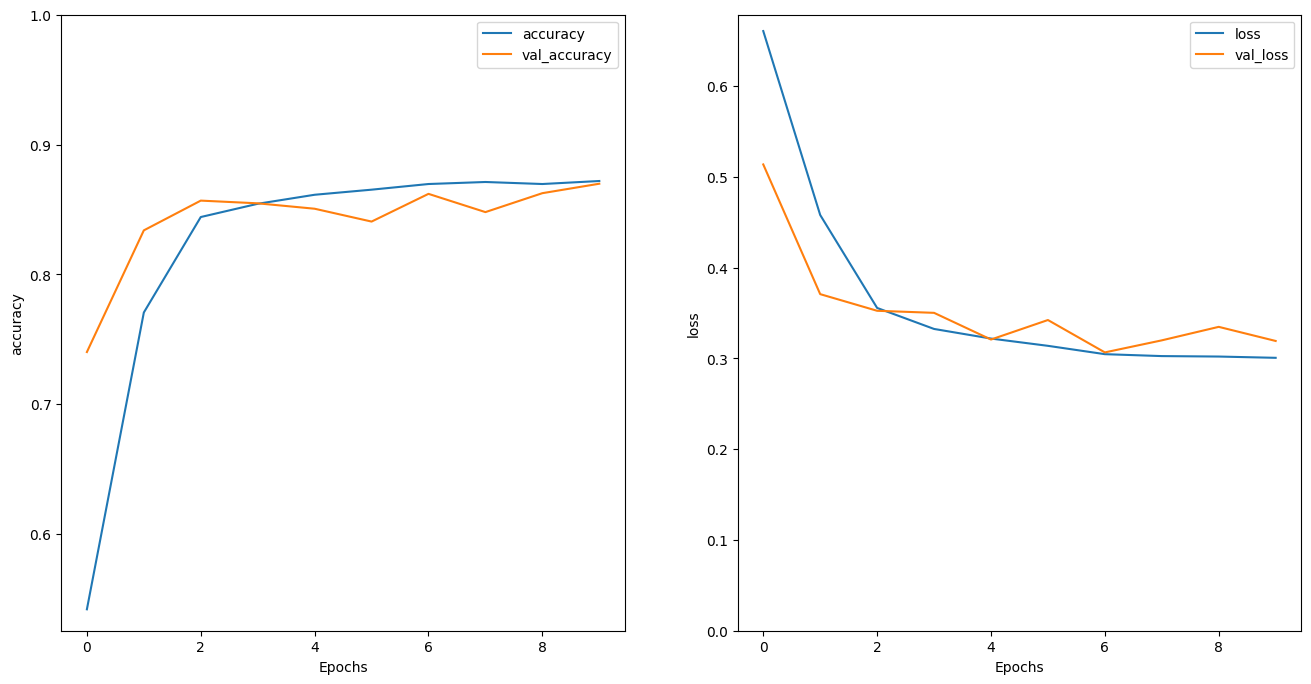

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

## Stack two or more LSTM layers

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

#### https://www.tensorflow.org/guide/keras/rnn

## Avec notre data !


In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# Parameters
BUFFER_SIZE = 1000000
BATCH_SIZE = 16
VOCAB_SIZE = 15000
EPOCHS = 10

# Path to data
data_dir = "../../../data/twitter-datasets"  # Adjust based on your file structure

# Determine split sizes without consuming the datasets
neg_size = sum(1 for _ in tf.data.TextLineDataset(os.path.join(data_dir, "train_neg.txt")))
pos_size = sum(1 for _ in tf.data.TextLineDataset(os.path.join(data_dir, "train_pos.txt")))

print(f"Negative samples: {neg_size}, Positive samples: {pos_size}")

# Create datasets for negative and positive samples
neg_dataset = tf.data.TextLineDataset(os.path.join(data_dir, "train_neg.txt")).map(lambda x: (x, 0))
pos_dataset = tf.data.TextLineDataset(os.path.join(data_dir, "train_pos.txt")).map(lambda x: (x, 1))

# Shuffle datasets
neg_dataset = neg_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)
pos_dataset = pos_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

# Determine split sizes
neg_train_size = int(0.8 * neg_size)
pos_train_size = int(0.8 * pos_size)

# Split datasets
neg_train = neg_dataset.take(neg_train_size)
neg_test = neg_dataset.skip(neg_train_size)
pos_train = pos_dataset.take(pos_train_size)
pos_test = pos_dataset.skip(pos_train_size)

# Combine datasets
train_dataset = neg_train.concatenate(pos_train)
test_dataset = neg_test.concatenate(pos_test)

# Count samples
num_train_samples = neg_train_size + pos_train_size
num_test_samples = neg_size + pos_size - num_train_samples

print(f"Training samples: {num_train_samples}, Testing samples: {num_test_samples}")

# Shuffle and batch datasets
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Prepare the TextVectorization layer
# encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
# encoder.adapt(train_dataset.map(lambda text, label: text))

# Load the vocabulary from file
vocab = np.load('../../../data/vocab/RNN_vocab.npy', allow_pickle=True)

# Recreate the encoder and set its vocabulary
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.set_vocabulary(vocab)

# Verify
print("Vocabulary Size:", len(encoder.get_vocabulary()))
print("Sample Vocabulary:", encoder.get_vocabulary()[:10])

# Build the model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

# Calculate steps per epoch
train_steps_per_epoch = num_train_samples // BATCH_SIZE
validation_steps = num_test_samples // BATCH_SIZE

# Train the model
history = model.fit(
    train_dataset.repeat(),
    epochs=EPOCHS,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test_dataset.repeat(),
    validation_steps=validation_steps
)

# Evaluate the model
test_loss, test_acc = model.evaluate(
    test_dataset,
    steps=validation_steps
)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Plot the results
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.show()


2024-12-04 16:32:56.748323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Negative samples: 100000, Positive samples: 100000
Training samples: 160000, Testing samples: 40000
Vocabulary Size: 15000
Sample Vocabulary: ['', '[UNK]', 'user', 'i', 'the', 'to', 'you', 'url', 'a', 'and']
Epoch 1/10


2024-12-04 16:32:59.220151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  581/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 12ms/step - accuracy: 0.5230 - loss: 0.6667

KeyboardInterrupt: 

## Less overfit model

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Parameters
BATCH_SIZE = 128
EMBEDDING_DIM = 128
MAX_SEQUENCE_LENGTH = 50
EPOCHS = 10
initial_learning_rate = 1e-3

# Paths to data
data_dir = 'data/twitter-datasets'  # Adjust this to your data directory

# File paths
neg_file = os.path.join(data_dir, 'train_neg_full.txt')
pos_file = os.path.join(data_dir, 'train_pos_full.txt')

# Negative tweets dataset
neg_dataset = tf.data.TextLineDataset(neg_file).map(lambda x: (x, 0))
num_neg_samples = sum(1 for _ in tf.data.TextLineDataset(neg_file))

# Positive tweets dataset
pos_dataset = tf.data.TextLineDataset(pos_file).map(lambda x: (x, 1))
num_pos_samples = sum(1 for _ in tf.data.TextLineDataset(pos_file))

# Split negative dataset
neg_train = neg_dataset.take(int(0.8 * num_neg_samples))
neg_val = neg_dataset.skip(int(0.8 * num_neg_samples)).take(int(0.1 * num_neg_samples))
neg_test = neg_dataset.skip(int(0.9 * num_neg_samples))

# Split positive dataset
pos_train = pos_dataset.take(int(0.8 * num_pos_samples))
pos_val = pos_dataset.skip(int(0.8 * num_pos_samples)).take(int(0.1 * num_pos_samples))
pos_test = pos_dataset.skip(int(0.9 * num_pos_samples))

# Combine datasets
train_dataset = neg_train.concatenate(pos_train)
val_dataset = neg_val.concatenate(pos_val)
test_dataset = neg_test.concatenate(pos_test)

# Shuffle datasets
BUFFER_SIZE = 100000  # Adjust based on memory capacity
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE)

# Preprocessing function
def preprocess_text(text, label):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, r'http\S+', '')  # Remove URLs
    text = tf.strings.regex_replace(text, r'@\w+', '')     # Remove mentions
    text = tf.strings.regex_replace(text, r'#', '')        # Remove hashtags symbol
    text = tf.strings.regex_replace(text, r'[^\w\s]', '')  # Remove punctuation
    return text, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess_text, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_text, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_text, num_parallel_calls=tf.data.AUTOTUNE)

# Prepare the TextVectorization layer
VOCAB_SIZE = 30000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH,
    standardize=None,
    oov_token='[UNK]'
)

# Adapt the encoder on the training data
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab_size = len(encoder.get_vocabulary())
print(f"Vocabulary size: {vocab_size}")

# Build the model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Custom F1-score metric
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'))
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'))
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'))
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return f1

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)

# Class weights
neg_count = num_neg_samples
pos_count = num_pos_samples
total_count = neg_count + pos_count

weight_for_0 = (1 / neg_count) * (total_count) / 2.0
weight_for_1 = (1 / pos_count) * (total_count) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

# Set up early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Batch and prefetch datasets
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    class_weight=class_weight
)

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_f1 = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

# Plotting training and validation metrics
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


ValueError: Unrecognized keyword arguments passed to TextVectorization: {'oov_token': '[UNK]'}